<a href="https://colab.research.google.com/github/Adithyan773/Google-colab-models/blob/main/mobile_price_prediction_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
od.download("https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adithyan
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction


100%|██████████| 19.3k/19.3k [00:00<00:00, 18.1MB/s]

In [4]:
df=pd.read_csv('/content/mobile-price-prediction/Cellphone.csv')

In [5]:
df

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [6]:
bd=df.drop(['Product_id','Sale'],axis=1)
bd['Price']=df['Price'].dropna()

In [7]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         161 non-null    int64  
 1   weight        161 non-null    float64
 2   resoloution   161 non-null    float64
 3   ppi           161 non-null    int64  
 4   cpu core      161 non-null    int64  
 5   cpu freq      161 non-null    float64
 6   internal mem  161 non-null    float64
 7   ram           161 non-null    float64
 8   RearCam       161 non-null    float64
 9   Front_Cam     161 non-null    float64
 10  battery       161 non-null    int64  
 11  thickness     161 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 15.2 KB


In [22]:
bd.corr()

,Price,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
Price,1.000000,0.247847,0.449168,0.770803,0.556781,0.517920,0.795395,0.813844,0.646441,0.445290,0.623626,-0.524257
weight,0.247847,1.000000,0.747893,0.145399,0.020745,0.104689,0.265320,0.312804,0.216654,0.245378,0.600990,0.222913
resoloution,0.449168,0.747893,1.000000,0.263025,0.353652,0.185284,0.335949,0.379989,0.439749,0.446373,0.534451,-0.181071
ppi,0.770803,0.145399,0.263025,1.000000,0.233403,0.740618,0.673434,0.717007,0.591591,0.217889,0.436347,-0.169744
cpu core,0.556781,0.020745,0.353652,0.233403,1.000000,-0.040758,0.361756,0.398352,0.427656,0.552974,0.310697,-0.493888
cpu freq,0.517920,0.104689,0.185284,0.740618,-0.040758,1.000000,0.453351,0.482808,0.420672,-0.017182,0.249092,-0.034238
internal mem,0.795395,0.265320,0.335949,0.673434,0.361756,0.453351,1.000000,0.862299,0.454785,0.381488,0.663769,-0.386337
ram,0.813844,0.312804,0.379989,0.717007,0.398352,0.482808,0.862299,1.000000,0.573377,0.434361,0.710786,-0.336171
RearCam,0.646441,0.216654,0.439749,0.591591,0.427656,0.420672,0.454785,0.573377,1.000000,0.434138,0.475986,-0.268940
Front_Cam,0.445290,0.245378,0.446373,0.217889,0.552974,-0.017182,0.381488,0.434361,0.434138,1.000000,0.327590,-0.373996


In [8]:
bd.drop_duplicates()

,Price,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,1749,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,1916,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,1315,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
5,2137,150.0,5.50,401,4,2.300,16.0,2.000,16.00,8.0,2500,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...
152,4361,238.0,5.70,515,8,1.950,128.0,6.000,12.00,8.0,7000,7.4
154,2536,202.0,6.00,367,8,1.500,16.0,3.000,21.50,16.0,2700,8.4
155,3551,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,3211,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [9]:
bd.isnull().sum()

,0
Price,0
weight,0
resoloution,0
ppi,0
cpu core,0
cpu freq,0
internal mem,0
ram,0
RearCam,0
Front_Cam,0


In [10]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         161 non-null    int64  
 1   weight        161 non-null    float64
 2   resoloution   161 non-null    float64
 3   ppi           161 non-null    int64  
 4   cpu core      161 non-null    int64  
 5   cpu freq      161 non-null    float64
 6   internal mem  161 non-null    float64
 7   ram           161 non-null    float64
 8   RearCam       161 non-null    float64
 9   Front_Cam     161 non-null    float64
 10  battery       161 non-null    int64  
 11  thickness     161 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 15.2 KB


In [11]:
column_name=np.array(['Price', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'])
def check_outliers(bd,column_name):
  for column in column_name:
    plt.boxplot(bd[column])
    plt.title(column)
    plt.show()


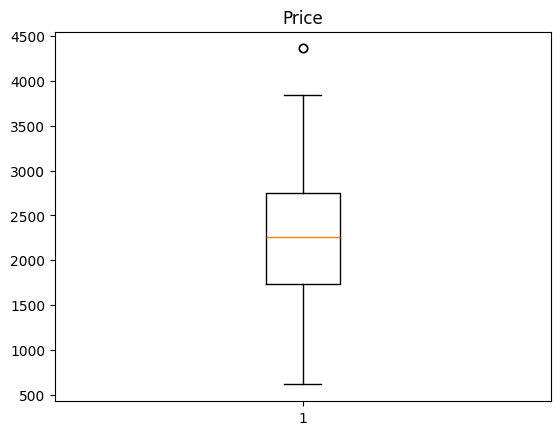

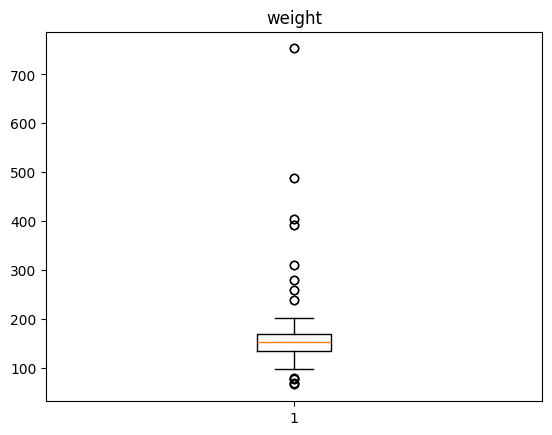

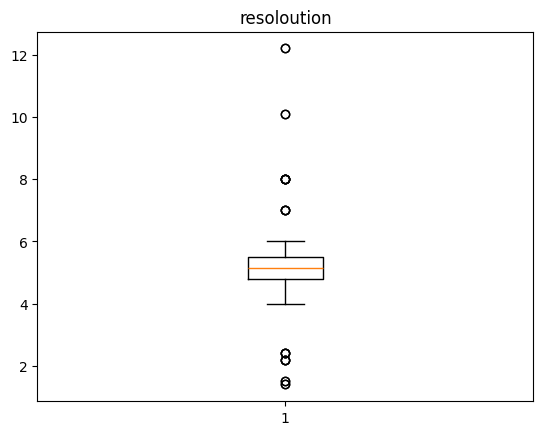

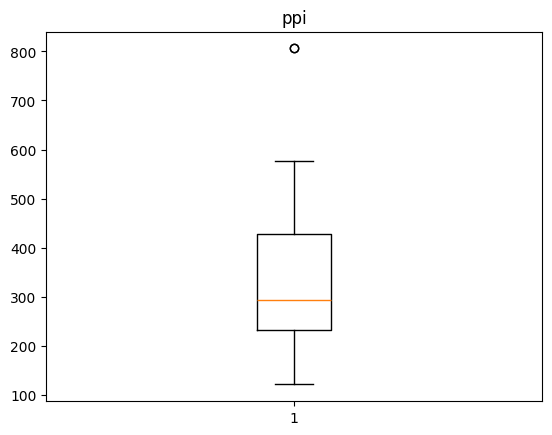

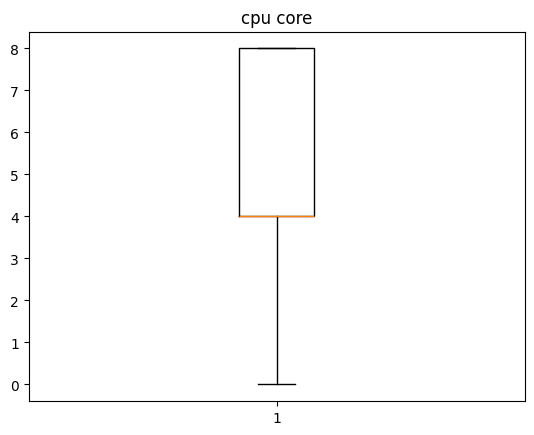

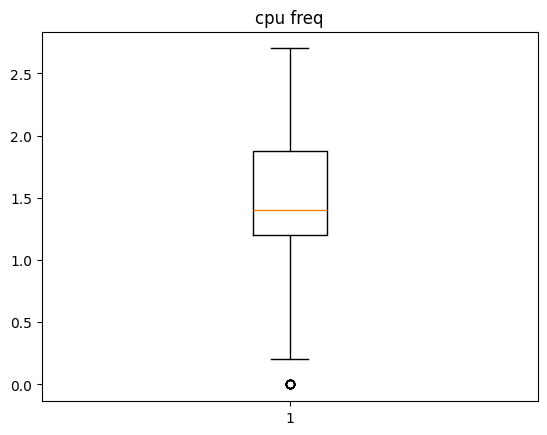

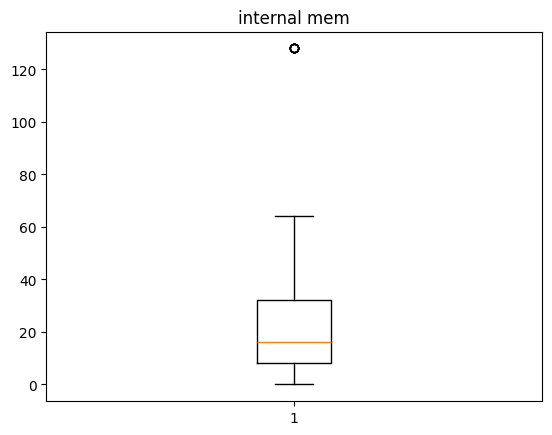

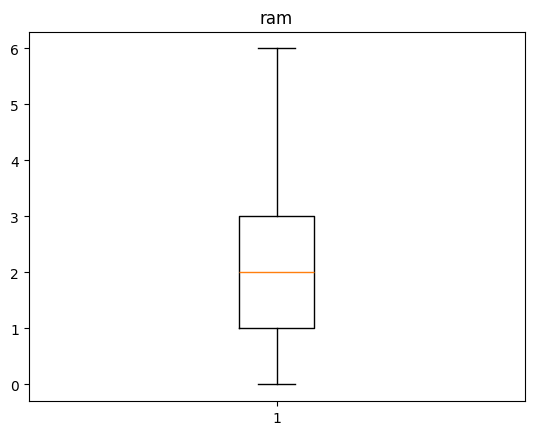

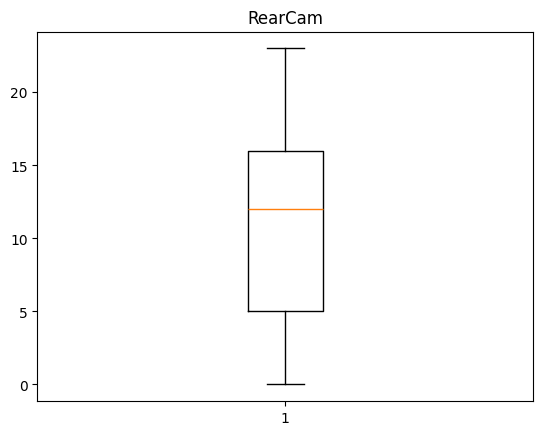

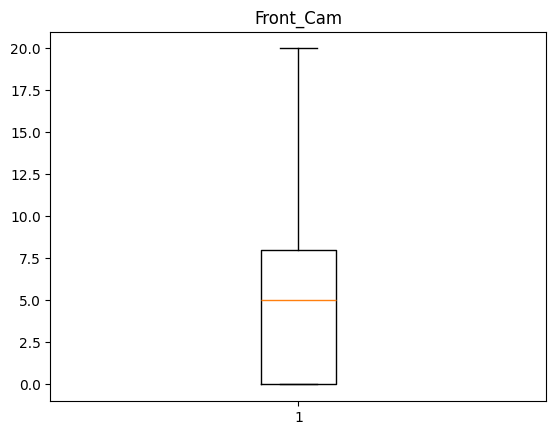

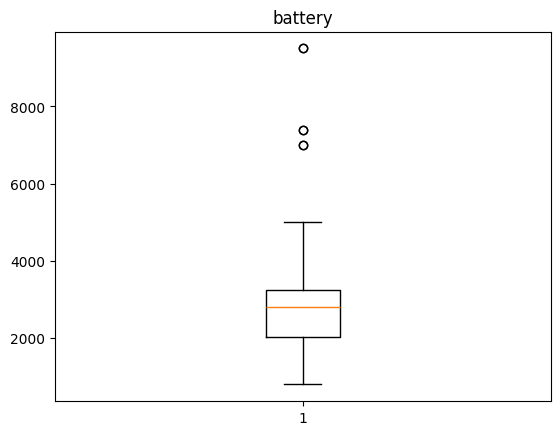

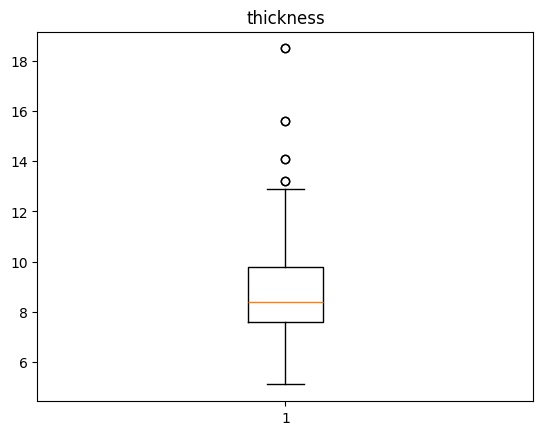

In [12]:
check_outliers(bd,column_name)

In [13]:
column_name=np.array(['weight', 'resoloution', 'ppi', 'internal mem', 'battery', 'thickness'])
for i in column_name:
 Q1 = bd[i].quantile(0.25)
 Q3 = bd[i].quantile(0.75)
 IQR = Q3 - Q1
 lower_bound = Q1 - 1.5 * IQR
 upper_bound = Q3 + 1.5 * IQR
 bd= bd[(bd[i] >= lower_bound) & (bd[i] <= upper_bound)]

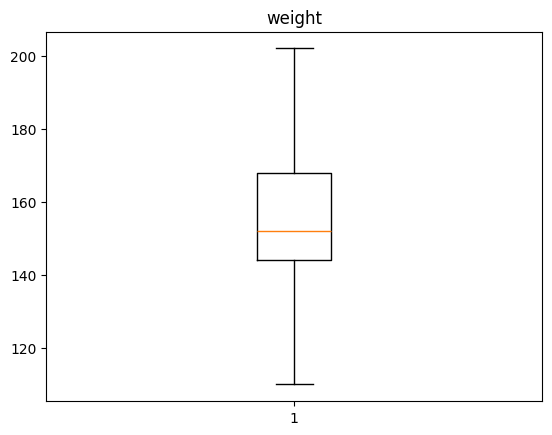

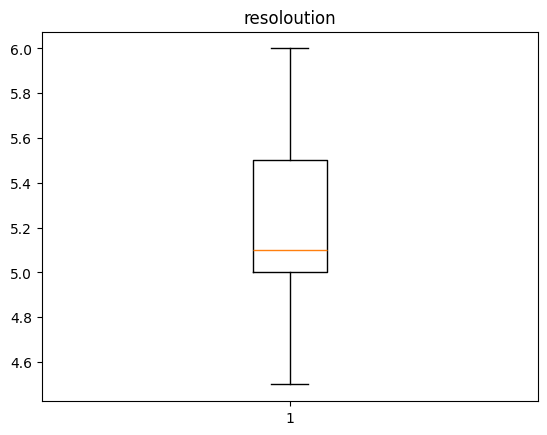

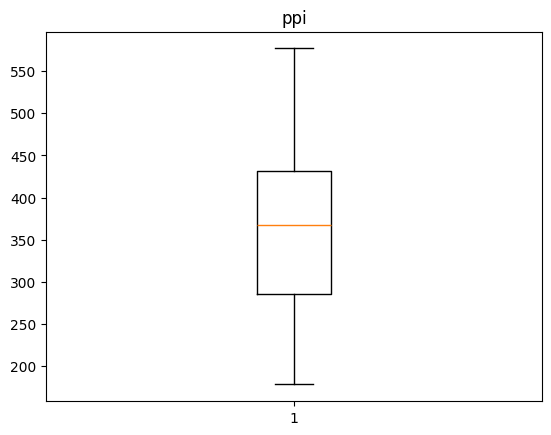

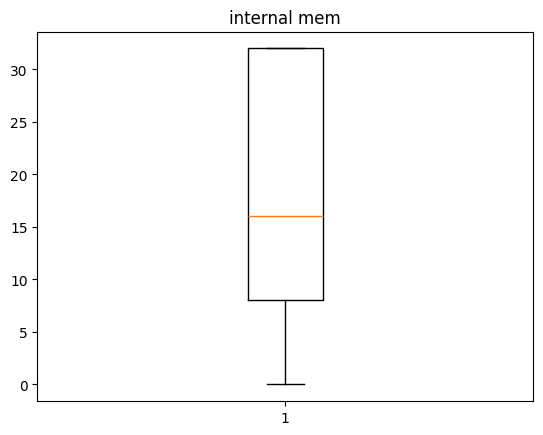

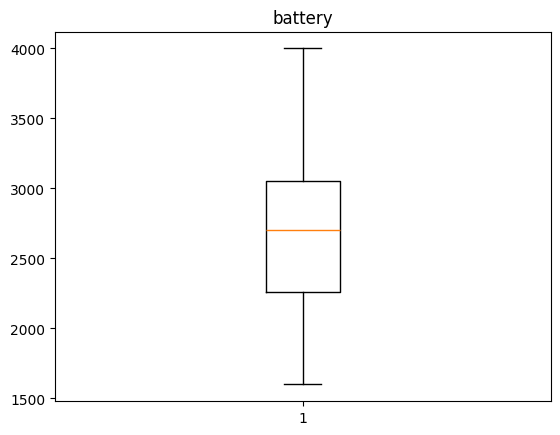

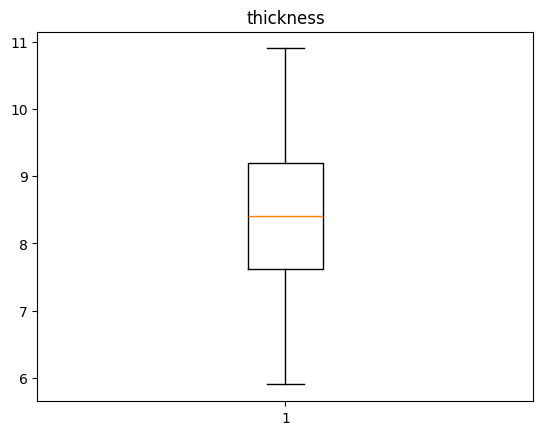

In [14]:
check_outliers(bd,column_name)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
x = bd[['weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness' ]]
y = bd['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
x_train=imputer.fit_transform(x_train)
x_test=imputer.transform(x_test)

In [19]:
le=LinearRegression()
le.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = le.predict(x_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 39086.36095946734
R-squared: 0.8501677457562953
